In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


import seaborn as sns
sns.set()

In [2]:
# all paths and important links here
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [3]:
# ALL STABLE FUNCTIONS HERE

#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [6]:
#ROUTINE CALLS HERE

#download data for the most recent week
# download_and_store_data(2021)
#load downloaded data
data = load_data(2021)

In [43]:
#load all data
data1 = load_multi_years()

In [9]:
data[-10:]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
49787,3449,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,-1.310547,NaN,NaN,NaN,NaN,NaN,0.759290,-75.929022
49788,3470,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49789,3487,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49790,3504,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.925343,NaN,NaN,NaN,NaN,NaN,0.591053,-59.105307
49791,3525,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,-0.038293,NaN,NaN,NaN,NaN,NaN,0.635728,-63.572812
49792,3546,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49793,3563,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.444560,NaN,NaN,NaN,NaN,NaN,0.599282,-59.928155
49794,3584,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49795,3601,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.711415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49796,3620,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2022-02-15

- calculate qb's average epa per play up to the Superbowl and see how often QBs with superior EPA wins the Superbowl


In [10]:
#check all qbs with 200 pass plays a season. calculate average epa per play
#see which play has/hasn't epa i.e check for null vals in epa
cols = ['passer_player_id', 'passer_player_name', 'epa']

In [29]:
g = data.groupby(['posteam', 'passer_player_id', 'passer_player_name'])
df = g[['epa']].agg({'epa':['count', 'mean']})#, 'epa':'mean'})
df

epa          
                                            count      mean
posteam passer_player_id passer_player_name                
ARI     00-0022824       A.Lee                  1 -0.947000
        00-0027688       C.McCoy              105  0.136319
        00-0029747       C.Banjo                1  3.731528
        00-0034775       C.Kirk                 1  3.030577
        00-0035228       K.Murray             551  0.069809
...                                           ...       ...
TEN     00-0035676       A.Brown                2 -0.625729
WAS     00-0023682       R.Fitzpatrick          7 -0.610660
        00-0031395       G.Gilbert             33 -0.083345
        00-0031800       T.Heinicke           535 -0.078863
        00-0034577       K.Allen               22  0.017846

[128 rows x 2 columns]

In [75]:
# df.columns = df.columns.droplevel()
df.columns = ['pass_epa_count', 'pass_epa_mean']
df1 = df[df['pass_epa_count']>200]
df1.sort_values('pass_epa_mean', ascending=False)
df1['rank'] = range(df1.shape[0])
df1
# df1.sort_values('epa', ascending=False)

<ipython-input-75-7e8c2d6e3676>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rank'] = range(df1.shape[0])


pass_epa_count  pass_epa_mean  \
posteam passer_player_id passer_player_name                                  
ARI     00-0035228       K.Murray                       551       0.069809   
ATL     00-0026143       M.Ryan                         602      -0.031178   
BAL     00-0034796       L.Jackson                      425       0.026497   
        00-0035993       T.Huntley                      208      -0.147455   
BUF     00-0034857       J.Allen                        656       0.123551   
CAR     00-0034869       S.Darnold                      442      -0.186216   
CHI     00-0027973       A.Dalton                       257      -0.116942   
        00-0036945       J.Fields                       306      -0.212186   
CIN     00-0036442       J.Burrow                       655       0.142700   
CLE     00-0034855       B.Mayfield                     464      -0.033552   
DAL     00-0033077       D.Prescott                     679       0.138848   
DEN     00-0031237       T.Bridgewater                  460       0.113098   
DET     00-0033106       J.Goff                         533      -0.064859   
GB      00-0023459       A.Rodgers                      321       0.255275   
                         Aa.Rodgers                     275       0.145079   
HOU     00-0036898       D.Mills                        426      -0.117793   
IND     00-0032950       C.Wentz                        552       0.012782   
JAX     00-0036971       T.Lawrence                     639      -0.114563   
KC      00-0033873       P.Mahomes                      730       0.201786   
LA      00-0026498       M.Stafford                     651       0.201805   
LAC     00-0036355       J.Herbert                      710       0.149855   
LV      00-0031280       D.Carr                         726       0.031346   
MIA     00-0033119       J.Brissett                     245      -0.106037   
        00-0036212       T.Tagovailoa                   410       0.050468   
MIN     00-0029604       K.Cousins                      592       0.106794   
NE      00-0036972       M.Jones                        592       0.059472   
NO      00-0032156       T.Siemian                      201      -0.052201   
NYG     00-0035710       D.Jones                        384      -0.037607   
NYJ     00-0037013       Z.Wilson                       430      -0.222709   
PHI     00-0036389       J.Hurts                        507       0.013377   
PIT     00-0022924       B.Roethlisberger               694      -0.084216   
SEA     00-0029263       R.Wilson                       435       0.014227   
SF      00-0031345       J.Garoppolo                    520       0.135808   
TB      00-0019596       T.Brady                        783       0.184958   
TEN     00-0029701       R.Tannehill                    604       0.012730   
WAS     00-0031800       T.Heinicke                     535      -0.078863   

                                             rank  
posteam passer_player_id passer_player_name        
ARI     00-0035228       K.Murray               0  
ATL     00-0026143       M.Ryan                 1  
BAL     00-0034796       L.Jackson              2  
        00-0035993       T.Huntley              3  
BUF     00-0034857       J.Allen                4  
CAR     00-0034869       S.Darnold              5  
CHI     00-0027973       A.Dalton               6  
        00-0036945       J.Fields               7  
CIN     00-0036442       J.Burrow               8  
CLE     00-0034855       B.Mayfield             9  
DAL     00-0033077       D.Prescott            10  
DEN     00-0031237       T.Bridgewater         11  
DET     00-0033106       J.Goff                12  
GB      00-0023459       A.Rodgers             13  
                         Aa.Rodgers            14  
HOU     00-0036898       D.Mills               15  
IND     00-0032950       C.Wentz               16  
JAX     00-0036971       T.Lawrence            17  
KC      00-0033873       P.Mahomes      

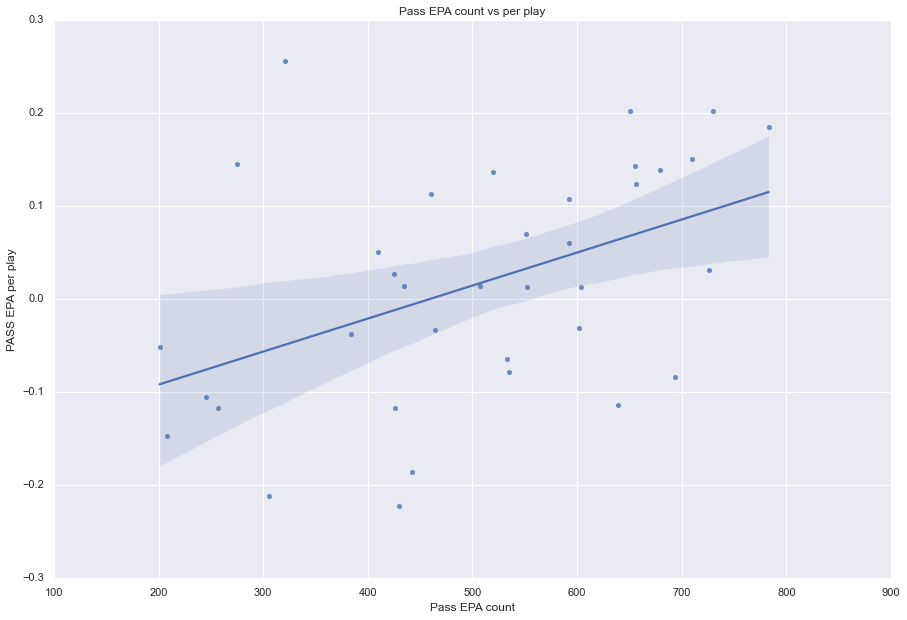

In [63]:
#plot epa_count vs epa_mean
plt.figure()
ax = sns.regplot(x='pass_epa_count',y='pass_epa_mean',data=df1)
ax.set(title='Pass EPA count vs per play', xlabel='Pass EPA count', ylabel='PASS EPA per play')
plt.savefig('pass epa per play vs count.png')
plt.show()

In [62]:
#find 2 QBs in a a season Superbowl
#do for season 1

#plot their EPA per play rank, for QBs with moare then 300 passes per saeson
#

<Figure size 1080x720 with 0 Axes>

In [80]:
# for each season, excluding the superbowl game: find pass epa per play
# for QBs min 300 passes
d20_1 = d20[d20.week!=21].copy()
g = d20_1.groupby(['posteam', 'passer_player_id', 'passer_player_name'])
df = g[['epa']].agg({'epa':['count', 'mean']})#, 'epa':'mean'})
df.columns = df.columns.droplevel()
df.columns = ['pass_epa_count', 'pass_epa_mean']

df1 = df[df['pass_epa_count']>200]
df1 = df1.sort_values('pass_epa_mean', ascending=False)
df1['rank'] = range(df1.shape[0])
df1

,,,pass_epa_count,pass_epa_mean,rank
posteam,passer_player_id,passer_player_name,,,
GB,00-0023459,A.Rodgers,637,0.305476,0
KC,00-0033873,P.Mahomes,682,0.293810,1
TEN,00-0029701,R.Tannehill,534,0.223442,2
BUF,00-0034857,J.Allen,728,0.218204,3
TB,00-0019596,T.Brady,747,0.203684,4
HOU,00-0033537,D.Watson,597,0.193416,5
IND,00-0022942,P.Rivers,611,0.177793,6
MIA,00-0023682,R.Fitzpatrick,283,0.172061,7
MIN,00-0029604,K.Cousins,562,0.150313,8


In [ ]:
def find_rank(qb_name):
#     return df.loc[]

In [73]:
# d20 = data1[data1.season==2020].copy()
# bowl = d20[d20.week==21].copy()
bowl
#find passers in superbowl
bowl.groupby(['posteam', 'passer_player_name'])['passer_player_name'].count()

posteam  passer_player_name
KC       P.Mahomes             52
TB       T.Brady               30
Name: passer_player_name, dtype: int64

# needs to be done
- indexing a multiindex col using only one level
    like `df[pass_name=='aaron rodgers', rank]`
- 